In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Iris.csv",header = None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.columns = ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","Species"]

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Data Cleaning

In [7]:
df[df == "?"].count()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df = df.replace("?", pd.NA)

In [9]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
df.dropna()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
df_n = (df.iloc[:, 0:4] < 0).any(axis=1)
df = df[~df_n]

In [12]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Plots (Not Necessary)

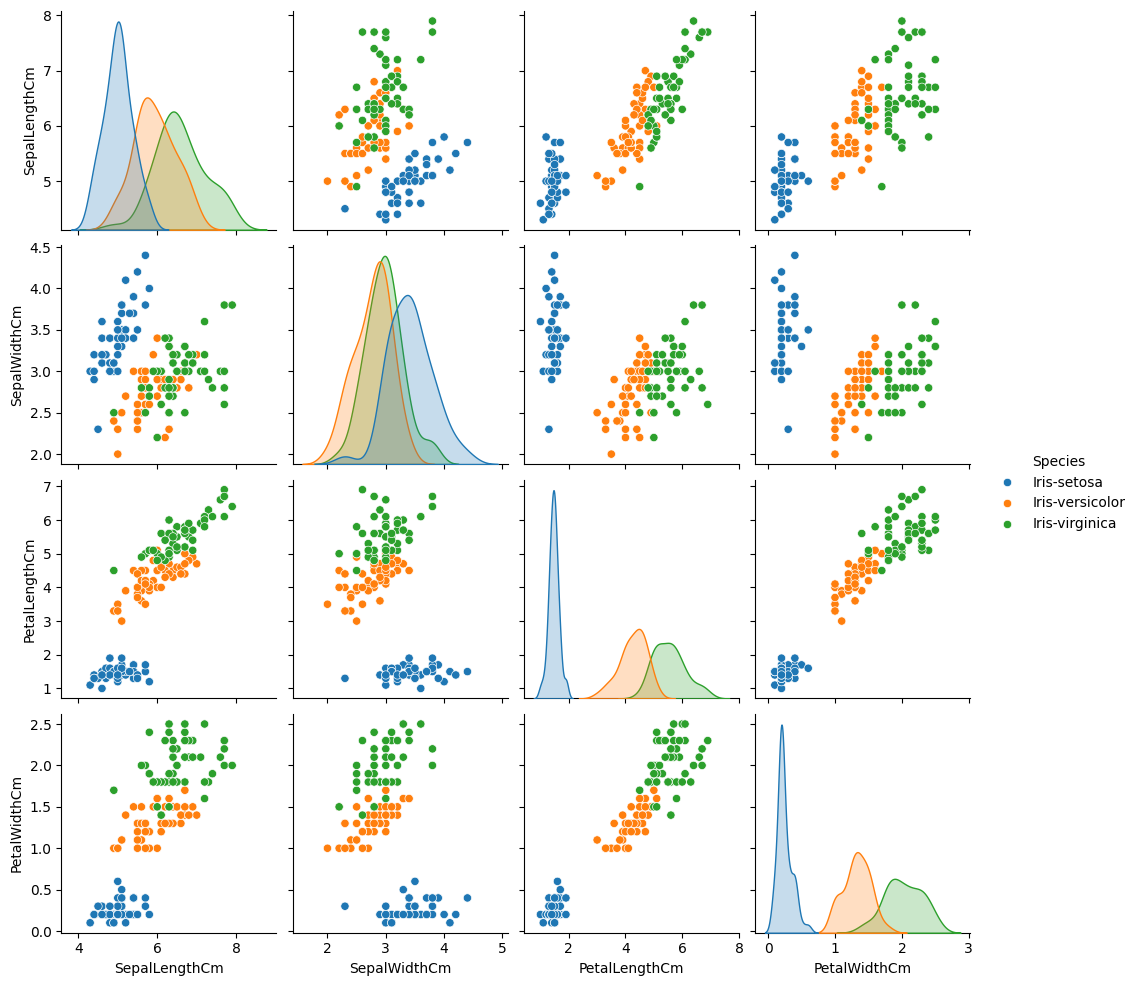

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, hue='Species')

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

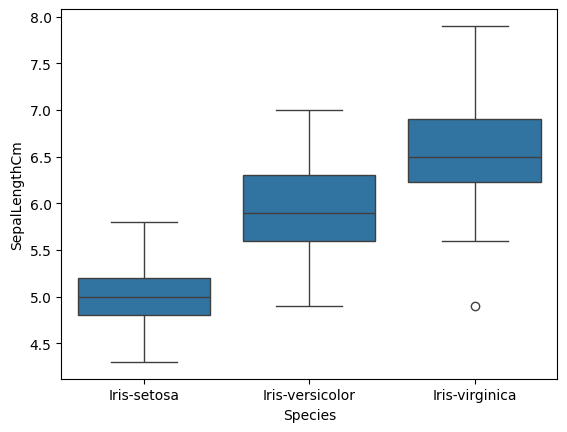

In [14]:
sns.boxplot(df, x='Species', y='SepalLengthCm')

<Axes: xlabel='SepalLengthCm', ylabel='Count'>

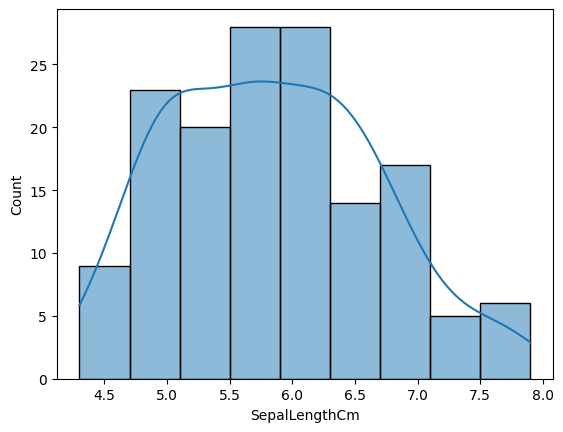

In [15]:
sns.histplot(df, x="SepalLengthCm", kde=True)

<Axes: >

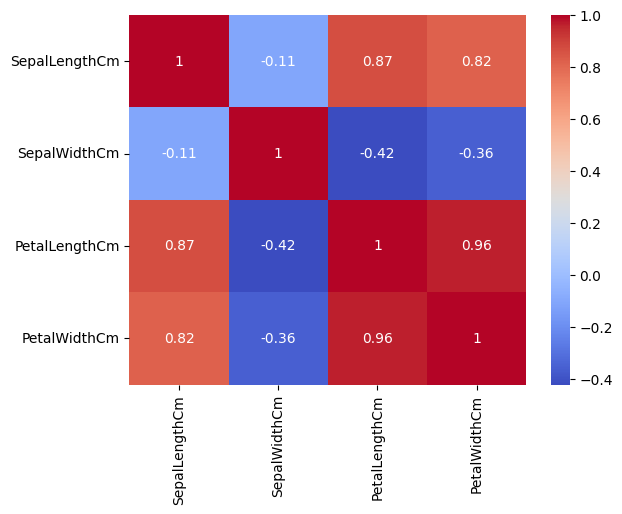

In [16]:
sns.heatmap(df.iloc[:, 0:4].corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

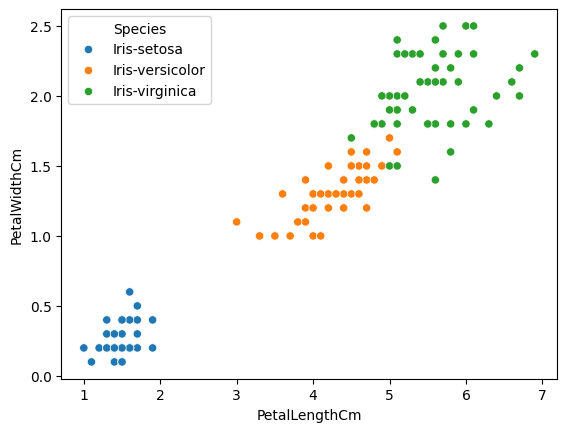

In [17]:
sns.scatterplot(df, x='PetalLengthCm', y='PetalWidthCm', hue='Species')

# Error Correcting

In [18]:
from scipy.stats import zscore

In [19]:
z_scores = zscore(df.drop('Species', axis=1))

abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)

df = df[filtered_entries]

In [20]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
# # Without using zscore function

# def remove_outliers_zscore(data, threshold=3):
#     z_scores = np.abs((data - data.mean()) / data.std())  # Calculate Z-scores
    
#     out = z_scores > 3
    
#     data = data[~out.any(axis=1)]
    
#     return data
    
# filtered_data = remove_outliers_zscore(df)

In [22]:
df.shape

(149, 5)

# Data Transformation

In [23]:
from sklearn.model_selection import train_test_split
x = df.iloc[:, 0:4]
y = df.iloc[:, 4]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [24]:
x.shape

(149, 4)

In [25]:
x_train.shape

(119, 4)

### Feature Scaling

In [26]:
# from sklearn.preprocessing import StandardScaler

# # Initialize the scaler
# scaler = StandardScaler()

# # Fit and transform the training data
# x_train_scaled = scaler.fit_transform(x_train)

# # Transform the test data
# x_test_scaled = scaler.transform(x_test)

In [27]:
print(x_train)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
28             5.2           3.4            1.4           0.2
98             5.1           2.5            3.0           1.1
97             6.2           2.9            4.3           1.3
70             5.9           3.2            4.8           1.8
19             5.1           3.8            1.5           0.3
..             ...           ...            ...           ...
9              4.9           3.1            1.5           0.1
104            6.5           3.0            5.8           2.2
68             6.2           2.2            4.5           1.5
118            7.7           2.6            6.9           2.3
48             5.3           3.7            1.5           0.2

[119 rows x 4 columns]


### Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()
le.fit(df['Species'])
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [30]:
df['Species'] = le.transform(df['Species'])

C:\Users\dsb71\AppData\Local\Temp\ipykernel_10076\1100497812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Species'] = le.transform(df['Species'])


In [31]:
# Manual Way
# Convert the target variable to numerical values
# df['Species'] = df['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

In [32]:
# df = df.drop('species', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Building

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

### Logistic Regression

In [34]:
logReg = LogisticRegression()
logReg.fit(x_train, y_train)

C:\Users\dsb71\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
y_test_pred_logReg = logReg.predict(x_test)

Accuracy Score (Logistic Regression) :  0.9333333333333333


Text(0.5, 1.0, 'Confusion Matrix')

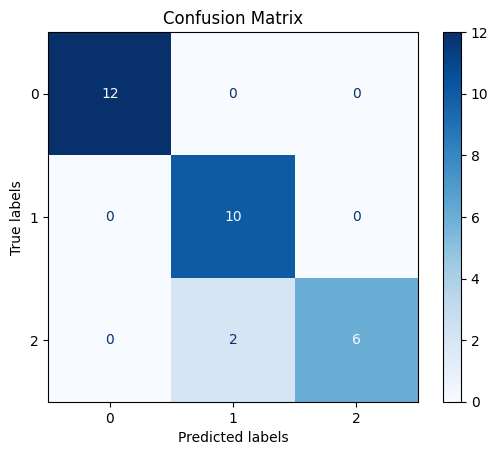

In [36]:
print("Accuracy Score (Logistic Regression) : ", accuracy_score(y_test, y_test_pred_logReg))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_test_pred_logReg)).plot(cmap='Blues', xticks_rotation='horizontal')
# plt.figure(figsize=(8, 6))
# sns.heatmap(confusion_matrix(y_test,y_test_pred_logReg), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
# plt.show()

### Naive Bayes

In [37]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [38]:
y_test_pred_nb = naive_bayes.predict(x_test)

In [39]:
print("Accuracy Score (Naive Bayes) : ", accuracy_score(y_test, y_test_pred_nb))

Accuracy Score (Naive Bayes) :  0.9


### K-Nearest Neighbors

In [40]:
knn = KNeighborsClassifier()
knn.fit(x_test, y_test)

KNeighborsClassifier()

In [41]:
y_test_pred_knn = knn.predict(x_test)

In [42]:
print("Accuracy Score (K-Nearest Neighbors) : ", accuracy_score(y_test, y_test_pred_knn))

Accuracy Score (K-Nearest Neighbors) :  0.9666666666666667


In [43]:
df.loc[df['Species'] == 0, 'Species'] = "Iris-Setosa"

In [47]:
df[df['Species'] == 1]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1
